In [3]:
using OrdinaryDiffEq, ForwardDiff, Distributions, RandomNumbers, NPZ, PyPlot, StaticArrays, HDF5, CSV, DelimitedFiles

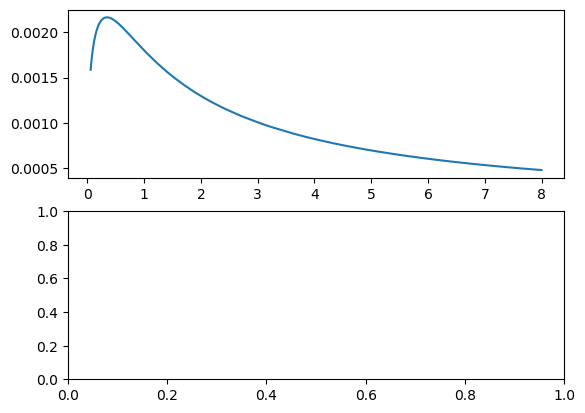

2.5621999122623187

In [4]:
Ns=16
Times=5000#000
listas=[0.6]
N=0
solu=0
w=0
alpha = 0.2
omega0 = 2 # (frequencia del sistema de dos niveles)
wc = 7*omega0/2
s = 0.1
a = 2.
b = 1.
Hpart!(x,p)=p^2. /2. -0.5*2. *x^2. +0.25*1. *x^4.
Hosci!(x,p,w)=p^2. /(0.1*2.)+0.05*w^2. *x^2.
Hcoup!(x,X,w,g)=-g*x*X +x*x*g*g/(2. *0.1*w*w)
#values=range(0.1,stop=6,length=9230329)
#golden=(1. +sqrt(5.))/2.
#mydist!(x)=x^0.515 * exp(-x/golden)
#probabilities = mydist!.(values)

pygui(false)
#fig, axes = subplots(nrows=2, ncols=1)
#subplot(2, 1, 1)
#plot(values,probabilities)
#sumaprob=sum(probabilities)
#probabilities=probabilities./sumaprob
#subplot(2, 1, 2)
#plot(values,probabilities)
#println(wp)
#plot(wp,weights)
probabilities=npzread("probs0.3.npy")
vals=npzread("values0.3.npy")
fig, axes = subplots(nrows=2, ncols=1)
subplot(2, 1, 1)
plot(vals,probabilities)
#xlim([0.3,0.8])
d = Categorical(probabilities)
vals[rand(d)] # sampling
#savefig("distribuciones.png")

In [17]:
s=0.3
lista=[0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.8,0.9,1.,1.5,2.]
#lista=[0.3]
nnn=0.
for oo in lista
println(nnn/size(lista)[1])
nnn=nnn+1.
s=oo

probabilities=npzread("probs$s.npy")
vals=npzread("values$s.npy")
#fig, axes = subplots(nrows=2, ncols=1)
#subplot(2, 1, 1)
#plot(vals,probabilities)
#xlim([0.3,0.8])
d = Categorical(probabilities)

# BOX MULLER
arraysize=60
u1 = rand(arraysize)
u2 = rand(arraysize)
#println(u1)
#println(u2)
z0 = map.(sqrt,-2* map.(log,u1)) .*map.(cos,2. *pi*u2)
z1 = map.(sqrt,-2* map.(log,u1)) .*map.(sin,2. *pi*u2)
#scatter(z0,z1)
#s=0.3

xz0=z0*0.15
pz1=z1*0.1
#Xz0=z0 .-33.5
#Pz1=z1*0.1 .+1.45
Pz1=z1*0.01*sqrt(0.05*2*0.1).-1. *0.015*sqrt(0.05*2*0.1)
Xz0=z0*0.01*sqrt((2*0.05)/(0.1*0.3*0.3)).+1. *0.015*sqrt((2*0.05)/(0.1*0.3*0.3))
#scatter(Xz0,Pz1)
#println(Pz1)
#println(Xz0)

function bolz_energy(a)
    return rand(Truncated(Normal(1), 0., 5))
end
N=arraysize
Times=10000#150000
w=zeros(N+1)
for ii in 1:N
    ii=Int(ii)
    w[ii+1] = vals[rand(d)]
end
function initial_sampling(Eb,w1,mb)
    #nums=rand(1)*1.5*pi.-0.5*pi
    nums=rand(1)*2. *pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1
end

Es=zeros(N+1)
Es=(bolz_energy.(Es))
Es=Es./(sum(Es[2:end])/0.1)
#initial_position=x0
#initial_momentum=p0
initial_position=zeros(N+1)
initial_momentum=zeros(N+1)
a=2.
b=1.

time=Times
#time=1.
tspan=(0., time)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
g00=0.1
g=g .* 0. .+ g00/sqrt(N)
#g=g .* 0. .+ 0.1/N
#g=g .* 0. .+ 0.1
W=12.
dts=0.1*2. *pi/W
#w[2]=0.66103076727067554

#E0=Hosci!(x0[2],p0[2],w[2])
#w=[0.0, 1.0213848227990752, 0.49280185811239285, 3.9612563679665787, 0.8313325208892569, 4.412630585002398, 2.1082464243458494, 6.1409187054948084, 2.0785507521724402, 1.4490025020961665, 0.6175236812407112, 3.4089168655411686, 2.2686030540822584, 1.2411327968823027, 4.590804618042853, 5.855840252630081]
#w=[1.4929064282270392, 0.7711005827026584, 0.01398351063734149, 0.5448755681128806, 0.8153942696601976]
#w=[0.0, 0.37528801404179746, 0.6360187014716939]
#w=[0.,0.5036118423070709, 0.29071094541241266]
#w=[0.0, 0.6902646834201959, 0.3957031685385455, 0.6161868371034245, 0.6348521212147369, 0.44878257023009044, 0.6272693495445162, 0.745677245625655, 0.414368452649858, 0.5047784225640279, 0.7065968070175943]
#w=[0.0, 0.4394499281744342, 0.7911738756469792, 0.7083466774030299, 0.357789310187442, 0.49311261999445766]
initial_position=Xz0
initial_momentum=Pz1
#println(initial_position)
#println(initial_momentum)

initial_position=pushfirst!(initial_position, 0.)
initial_momentum=pushfirst!(initial_momentum, 0.)
#initial_position=[0.0, 0.7991151013418429, -0.053002312574290444, -2.9624044392199833, 0.14043108368683033, 2.148848573004341]
#initial_momentum=[0.0, -0.03211701448752664, -0.01912203877339066, 0.024609646218932087, 0.0014788003664714978, 0.01272421508032925]
if oo==0.3
    w=[0.0, 4.128349191454506, 1.4174004391472173, 0.2885009587142704, 7.634297577869503, 4.191949162183122, 2.0136501647279994, 0.12155103555165153, 2.2044500769138495, 1.3299504793953694, 3.6036494329434174, 4.311199107299279, 7.038047852288721, 1.3697004611007548, 4.017049242679426, 7.030097855947644, 1.5128003952401423, 3.5956994366023403, 2.8483997805410937, 4.2873491182760475, 3.9057492939043468, 7.64224757421058, 0.8211507135664355, 3.6672494036720344, 3.540049462214801, 6.664398024258098, 0.1533510209159599, 4.780248891422827, 2.697349850060629, 0.9086006733182835, 0.7655007391788959, 4.756398902399596, 5.312898646274992, 1.5287003879222965, 2.840449784200017, 0.6701007830859709, 2.164700095208464, 6.46564811573117, 0.7496007464967417, 2.2283000659370806, 1.115300578186288, 5.463948576755457, 0.8927006806361294, 4.77229889508175, 1.6400003366973759, 4.5814989828959, 0.34415093310181005, 0.1295010318927286, 1.2584005123256754, 2.3078000293478516, 4.5814989828959, 3.9057492939043468, 5.265198668228529, 1.4253504354882944, 1.234550523302444, 3.818299334152499, 1.0119506257522857, 2.9994497110215588, 4.517899012167283, 6.258948210863166, 1.9421001976583052]
end
initial_position=[0.0, 0.05525568984556402, 0.07173909140623981, 0.05442892424472316, 0.03906911967496949, 0.07464202452036783, 0.0823927373812032, 0.074338539978647, 0.06747822144994668, 0.08432408630124663, 0.038664581448846186, 0.08659701853560878, 0.08243872338321098, 0.1119109361071928, 0.02307267710770501, 0.033553285136882646, 0.07131839410462373, 0.056487595955618274, 0.07927411962141731, 0.026792719069329334, 0.021530765442077923, 0.04390822179522482, 0.06802375075082494, 0.07786407478463887, -0.026459946165475687, 0.054183322038398984, 0.049918579955209576, 0.05037933503082263, 0.0171018233882202, 0.04443364389897212, 0.07728112948167959, -0.016314907692478592, 0.0518684025965691, 0.03343767243438363, 0.04085087530098043, 0.07834629641840393, 0.07482130362841932, 0.05427327301296612, 0.040123327353589804, 0.1071299758079581, 0.09690531038177358, -0.03747756493301621, 0.11105952673299677, 0.07267205725782197, 0.07474341947419155, 0.04976284823844162, 0.013324124048331651, 0.05502444007918505, 0.08535893935035585, 0.06622510701876108, 0.07550827155059872, 0.12209848657697832, 0.011175216956387062, 0.047924414454114266, 0.13479170419762518, 0.00428775022326431, 0.05088110458531761, 0.029218928653540675, 0.05838156750657035, -0.0019635274687864676, -0.00407837409135333]
initial_momentum= [0.0, 9.91291787419287e-5, -0.00274626287335554, -0.0014165073297231635, -0.0017038195911939008, -0.002393889856464926, -0.0016919460723110935, -0.0029838209556432627, -0.002109607974570849, -0.0015820162665229013, -0.004120060299597173, -0.0013169920572308434, -0.00042988173097704453, -0.0024195558345607828, -0.003708940202706179, -0.002221783552070797, -0.0013247670682190005, -0.003123552106222576, -0.001620680576551974, -0.002317970831640243, -0.0004557192479849165, -0.0009787453321841583, -0.0014366397317464965, -0.0023471288364359426, -4.60897562846326e-5, -0.0017650768497257838, -0.0010323921125043464, -0.0023088412598876087, 0.0004887724968998105, -0.0005963190388370588, -0.000600156499465491, -0.0007501485551587357, -0.002053480655699551, -0.003454374805556208, -0.002230405494912443, -0.001273902216515865, 0.0005511708954373138, -0.0012877644393938844, -0.0016287537046312801, -0.002039866869836908, -0.0023083797284209283, -0.0030496695987260103, -0.0030220665653813493, -0.0015077483365073668, -0.0015559873246224552, -0.0006327678939049985, -0.000907071871571592, 0.0005768916801545247, -0.0015423475019617759, -0.0014068919965782147, -0.00078409853338337, -0.0018430920151851083, -0.0028425607346318667, -0.002796947856557198, -0.002233410347536778, -0.002491347431739728, -0.0018795750495114432, -0.0009028781665100003, -0.0015756595312875004, -0.0013257280631506086, -0.001232595603907539]
E0=0
for i in 2:N+1
    i=Int(i)
    
    E0=E0+Hosci!(initial_position[i],initial_momentum[i],w[i])
end
#initial_position[2+2]=(-1. )*initial_position[2+2]
#initial_momentum[2+3]=(-1. )*initial_momentum[2+3]
#initial_position[2+5]=(-1. )*initial_position[2+5]
#initial_momentum[2+12]=(-1. )*initial_momentum[2+12]
#println("E0= ", E0)
#println("w0= ", w)
#println("x0= ", initial_position)
#println("p0= ", initial_momentum)
#println(Es)


function Hsys(q,p,N0)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N0
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol = solve(prob, VerletLeapfrog(), dt=dts, abstol=1e-14, reltol=1e-14) #CalvoSanz4
pygui(false)
fig, axes = subplots(nrows=2, ncols=1)

inis=[w, initial_position, initial_momentum]

writedlm( "info_N$N _s$s.csv", inis, ',')
subplot(2, 1, 1)
title("Random case s=$s, N=$N oscillators \n \n Initial energy = $E0 , coupling g=$g00 /sqrt(N) \n \n Particle Energy vs time for N=$N oscillators")
xlabel("t")
ylabel("H_{particle}")
axhline(y=1., color="g", linestyle="-")
plot(sol.t[:], (Hpart!.(sol[N+2,:]  ,sol[1,:])).+1.,color=(0.68,75/255,102/255),linewidth=0.5,alpha=0.8)
#xscale("log")
ylim([0,1.1])
PyPlot.grid()
subplot(2, 1, 2)
title("Particle position vs time for N=$N oscillators")
xlabel("t")
ylabel("x")
plot(sol.t[:], sol[N+2,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
#xscale("log")
#xlim([10,sol.t[end]])
#subplot(3, 1, 3)
#title("Oscillators total energy vs time for N=$N oscillators")
#xlabel("t")
#ylabel("H_{oscillators}")
#Eoscirand=0
#axhline(y=1., color="g", linestyle="-")
#for i in 1:N
#    i=Int(i)
#    Eoscirand=Eoscirand .+ Hosci!.(sol[N+2+i,:],sol[1+i,:],w[i+1])
#end
#plot(sol.t[:], Eoscirand,color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
#xscale("log")
#xlim([10,sol.t[end]])
fig.tight_layout()
PyPlot.grid()
savefig("dynamics_$N _$s.png")
PyPlot.close()
fig, axes = subplots(nrows=2, ncols=1)
subplot(2, 1, 1)
title("Random case s=$s, N=$N oscillators \n \n Initial energy = $E0 , coupling g=$g00 /sqrt(N) \n \n Initial conditions in phase space")    

xlabel("x")
ylabel("p")
scatter(initial_position[1],initial_momentum[1],label="particle")
scatter(initial_position[2:end],initial_momentum[2:end],label="oscillators")
legend()
PyPlot.grid()

subplot(2, 1, 2)
title("Particle phase space")
xlabel("x")
ylabel("p")
plot(sol[N+2,:], sol[1,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
fig.tight_layout()
PyPlot.grid()
savefig("locs_$N _$s.png")
PyPlot.close()
end

0.0
646.554676 seconds (5.41 G allocations: 290.149 GiB, 24.79% gc time)
0.03333333333333333
760.432145 seconds (5.40 G allocations: 289.850 GiB, 30.66% gc time)
0.06666666666666667
389.751242 seconds (5.40 G allocations: 289.850 GiB, 21.49% gc time)
0.1
526.659022 seconds (5.40 G allocations: 289.850 GiB, 34.22% gc time)
0.13333333333333333
588.952782 seconds (5.40 G allocations: 289.850 GiB, 35.61% gc time)
0.16666666666666666
438.564883 seconds (5.40 G allocations: 289.850 GiB, 18.82% gc time)
0.2
509.828479 seconds (5.40 G allocations: 289.850 GiB, 35.24% gc time)
0.23333333333333334
495.014083 seconds (5.40 G allocations: 289.850 GiB, 29.69% gc time)
0.26666666666666666
376.307439 seconds (5.40 G allocations: 289.850 GiB, 20.16% gc time)
0.3
377.558707 seconds (5.40 G allocations: 289.850 GiB, 20.80% gc time)
0.3333333333333333
375.295021 seconds (5.40 G allocations: 289.850 GiB, 21.51% gc time)
0.36666666666666664
374.855560 seconds (5.40 G allocations: 289.850 GiB, 20.39% gc tim